In [109]:
%pylab inline
from scipy.integrate import quad
from scipy.misc import derivative

Populating the interactive namespace from numpy and matplotlib


In [110]:
data = loadtxt("../data/camb_linear_matterpower_z0.dat")
k = data[:,0]
P_k = data[:,1]

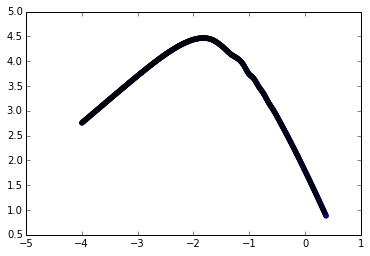

In [111]:
scatter(log10(k), log10(P_k))

How to compute the P-M.
1. Compute the sigma.
$\sigma_{\Delta}^2 = \dfrac{4\pi}{(2\pi)^{3/2}} \int k^2 P(k) |W_{k}(k)|^2$

2. Normalize using: $\sigma_8 = \sigma_{\Delta}(R = 8Mpc/h) = 0.813$

3. Derivate to find

$n(M)dM = \sqrt{\dfrac{2}{\pi} }\dfrac{\bar{\rho}}{m^2} \dfrac{\delta_c}{\sigma_m} exp \left [ \dfrac{-\delta_c}{2 \sigma_m^2} \right ] | \dfrac{dln\sigma_{m}}{dlnM}|dM$

In [145]:
# Window function W_R(x)

def W(r, k):
    Wk = 3 * (sin(k*r)- k*r*cos(k*r))/ (k*r)**3
    return Wk
def P_k(k):
    n = 1.0
    a = 6.4
    b = 3.0
    c = 1.7
    nu = 1.13
    Gamma = 0.21
    A = 89.08
    P = A * k**n / (1 + ( (a*k/Gamma) + (b*k/Gamma)**(3/2.) + (c*k/Gamma)**2 )**nu ) ** (1/nu)
    return P

In [146]:
k = linspace(0, 500, 50)
Wk = W(10, k)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


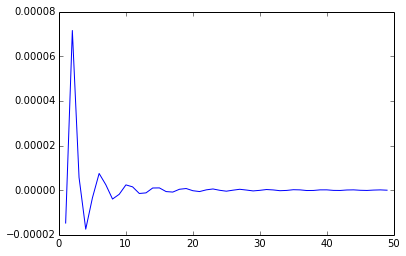

In [147]:
plot(Wk)

In [148]:
def sigma(x, r):
    Pk = P_k(x)
    Wk = W(r,x)
    return x**2.*Pk*abs(Wk)**2

In [149]:
r = 8
f = quad(sigma, 0, 1000, args=r)
print f
Sigmad2 =  4*pi / (2.*pi)**(3/2.) * f[0]
Sigmad = sqrt(Sigmad2)
print Sigmad2, Sigmad

sigma8 = 0.817

A =  sigma8 / Sigmad

print A

(0.009390434915101465, 1.2963041219895872e-05)
0.00749248303798 0.0865591302982
9.43863457483


/usr/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:295: UserWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg)


In [122]:
r = 10
derivative(sigma, 3.0, dx=1e-6)

TypeError: sigma() takes exactly 2 arguments (1 given)

In [10]:
from sympy import init_printing, integrate, Symbol, exp, cos, erf, sin
init_printing()
x = Symbol('x')
R = Symbol('R')
A = Symbol('A')
n = Symbol('n')
a = Symbol('a')
b = Symbol('b')
c = Symbol('c')
g = Symbol('g')
m = Symbol('m')
init_printing()

In [11]:
f = abs( 3/ (x*R) * sin(x*R) - x*R*cos(x*R) )**2 * x**2 * A * x**n / ( 1 + ( (a*x/g) + (b*x/g)**(3/2.) + (c*x/g)**2 )**m )**(1/m)

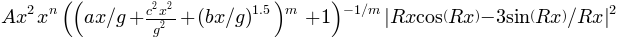

In [12]:
f